In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

#### Data Input and Output

In [2]:
X_IV=np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
Y_DV=np.array([[2],[1],[3],[6],[9],[11],[13],[15],[17],[20]])

In [4]:
#X_IV
Y_DV

array([[ 2],
       [ 1],
       [ 3],
       [ 6],
       [ 9],
       [11],
       [13],
       [15],
       [17],
       [20]])

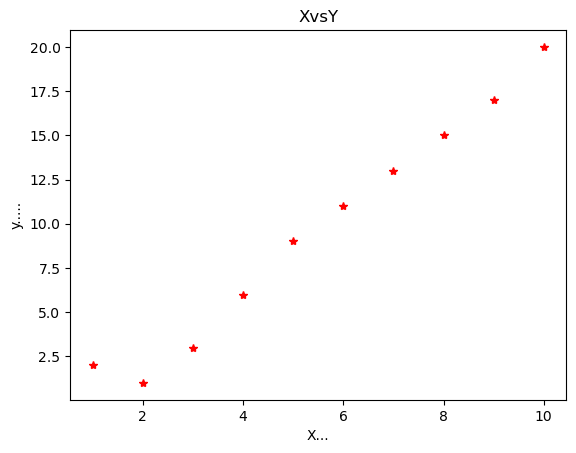

In [5]:
plt.plot(X_IV,Y_DV,"*r")
plt.xlabel("X...")
plt.ylabel("y.....")
plt.title("XvsY")
plt.show()

### Data Frame 

In [6]:
Data=pd.DataFrame({"Input":list(X_IV[:,0]),"OutPut":list(Y_DV[:,0])})

In [7]:
Data

,Input,OutPut
0,1,2
1,2,1
2,3,3
3,4,6
4,5,9
5,6,11
6,7,13
7,8,15
8,9,17
9,10,20


In [10]:
Data.corr()

,Input,OutPut
Input,1.000000,0.989938
OutPut,0.989938,1.000000


### Mean and Std 

In [8]:
Xmean=X_IV.mean()
Ymean=Y_DV.mean()

In [9]:
print(f"The mean of X is {Xmean} and Y is {Ymean}")

The mean of X is 5.5 and Y is 9.7


### Deviation from Mean X-Xmean,Y-Ymean

In [11]:
Data["X-Xmean"]=X_IV-Xmean
Data["Y-Ymean"]=Y_DV-Ymean

In [12]:
Data

,Input,OutPut,X-Xmean,Y-Ymean
0,1,2,-4.5,-7.7
1,2,1,-3.5,-8.7
2,3,3,-2.5,-6.7
3,4,6,-1.5,-3.7
4,5,9,-0.5,-0.7
5,6,11,0.5,1.3
6,7,13,1.5,3.3
7,8,15,2.5,5.3
8,9,17,3.5,7.3
9,10,20,4.5,10.3


### Covariance

In [ ]:
##(X-Xmean)*(Y-Ymean)

In [13]:
Data["Covariance"]=(X_IV-Xmean)*(Y_DV-Ymean)

In [14]:
Data

,Input,OutPut,X-Xmean,Y-Ymean,Covariance
0,1,2,-4.5,-7.7,34.65
1,2,1,-3.5,-8.7,30.45
2,3,3,-2.5,-6.7,16.75
3,4,6,-1.5,-3.7,5.55
4,5,9,-0.5,-0.7,0.35
5,6,11,0.5,1.3,0.65
6,7,13,1.5,3.3,4.95
7,8,15,2.5,5.3,13.25
8,9,17,3.5,7.3,25.55
9,10,20,4.5,10.3,46.35


In [15]:
#STD

In [16]:
XStd=sum(np.square(X_IV-Xmean))

In [17]:
XStd

array([82.5])

### coefficient or Slop (m) and Bias or Intercept (c)

In [18]:
m=sum(Data["Covariance"])/XStd
c=Ymean-m*Xmean

In [19]:
print(f" The Value of M is {m} and The Value of c is {c}")

 The Value of M is [2.16363636] and The Value of c is [-2.2]


### Model Equation Y=M*x+c

#Predicted Value

In [20]:
Yp=m*X_IV+c

In [21]:
Yp

array([[-0.03636364],
       [ 2.12727273],
       [ 4.29090909],
       [ 6.45454545],
       [ 8.61818182],
       [10.78181818],
       [12.94545455],
       [15.10909091],
       [17.27272727],
       [19.43636364]])

In [22]:
Data["Yp"]=Yp

In [23]:
Data

,Input,OutPut,X-Xmean,Y-Ymean,Covariance,Yp
0,1,2,-4.5,-7.7,34.65,-0.036364
1,2,1,-3.5,-8.7,30.45,2.127273
2,3,3,-2.5,-6.7,16.75,4.290909
3,4,6,-1.5,-3.7,5.55,6.454545
4,5,9,-0.5,-0.7,0.35,8.618182
5,6,11,0.5,1.3,0.65,10.781818
6,7,13,1.5,3.3,4.95,12.945455
7,8,15,2.5,5.3,13.25,15.109091
8,9,17,3.5,7.3,25.55,17.272727
9,10,20,4.5,10.3,46.35,19.436364


### Error [Actual-Predicted]

In [24]:
Error=np.square(Data["Yp"]-Data["OutPut"])

In [25]:
Data["Error"]=Error

In [26]:
Data

,Input,OutPut,X-Xmean,Y-Ymean,Covariance,Yp,Error
0,1,2,-4.5,-7.7,34.65,-0.036364,4.146777
1,2,1,-3.5,-8.7,30.45,2.127273,1.270744
2,3,3,-2.5,-6.7,16.75,4.290909,1.666446
3,4,6,-1.5,-3.7,5.55,6.454545,0.206612
4,5,9,-0.5,-0.7,0.35,8.618182,0.145785
5,6,11,0.5,1.3,0.65,10.781818,0.047603
6,7,13,1.5,3.3,4.95,12.945455,0.002975
7,8,15,2.5,5.3,13.25,15.109091,0.011901
8,9,17,3.5,7.3,25.55,17.272727,0.074380
9,10,20,4.5,10.3,46.35,19.436364,0.317686


### MSE

In [27]:
MSE=np.sqrt(Data["Error"].sum()/len(Data))
print(f"MSE IS {MSE}")

MSE IS 0.8883078909313532


# Ya vs Yp Graph

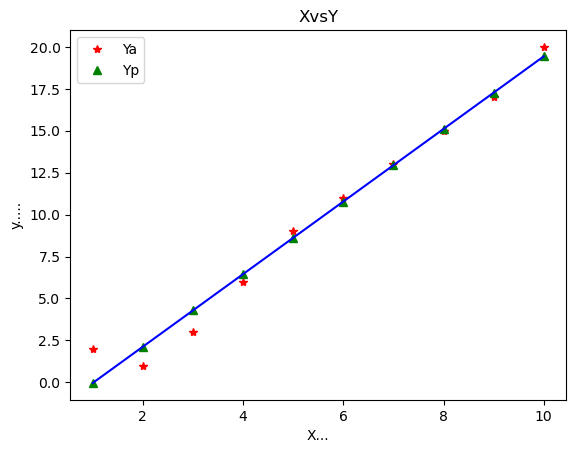

In [28]:
plt.plot(X_IV,Y_DV,"*r")
plt.plot(X_IV,Data["Yp"],'^g')
plt.plot(X_IV,Data["Yp"],'b')
plt.xlabel("X...")
plt.ylabel("y.....")
plt.title("XvsY")
plt.legend(["Ya","Yp"])
plt.show()

### Using Machine Learning Package  Sklean

In [29]:
from sklearn.linear_model import LinearRegression

In [34]:
trainer=LinearRegression()

In [35]:
dir(learner)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'n_jobs',
 'positive',
 'predict',
 'score',
 'set_params']

### Training 

In [36]:
leraner=trainer.fit(X_IV,Y_DV)

In [42]:
Lr_m=leraner.coef_

In [43]:
Lr_c=trainer.intercept_

In [44]:
print(f"m is {Lr_m} and c  {Lr_c} is by ML")

m is [[2.16363636]] and c  [-2.2] is by ML


In [45]:
Lr_Yp=trainer.predict(X_IV)

In [46]:
Lr_Yp

array([[-0.03636364],
       [ 2.12727273],
       [ 4.29090909],
       [ 6.45454545],
       [ 8.61818182],
       [10.78181818],
       [12.94545455],
       [15.10909091],
       [17.27272727],
       [19.43636364]])

In [47]:
Data["Yp_LR_Model"]=Lr_Yp

In [48]:
Data

,Input,OutPut,X-Xmean,Y-Ymean,Covariance,Yp,Error,Yp_LR_Model
0,1,2,-4.5,-7.7,34.65,-0.036364,4.146777,-0.036364
1,2,1,-3.5,-8.7,30.45,2.127273,1.270744,2.127273
2,3,3,-2.5,-6.7,16.75,4.290909,1.666446,4.290909
3,4,6,-1.5,-3.7,5.55,6.454545,0.206612,6.454545
4,5,9,-0.5,-0.7,0.35,8.618182,0.145785,8.618182
5,6,11,0.5,1.3,0.65,10.781818,0.047603,10.781818
6,7,13,1.5,3.3,4.95,12.945455,0.002975,12.945455
7,8,15,2.5,5.3,13.25,15.109091,0.011901,15.109091
8,9,17,3.5,7.3,25.55,17.272727,0.074380,17.272727
9,10,20,4.5,10.3,46.35,19.436364,0.317686,19.436364


## Error By Package


In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
Error_Lr=mean_squared_error(Lr_Yp,Y_DV)

In [51]:
Error_Lr

0.7890909090909094